# Convergência de Variáveis Aleatórias
**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np    
from scipy import stats
import matplotlib.pyplot as plt

## Teorema do Limite Central (CLT)

Dado um conjunto de variáveis aleatórias iid $X_i = \{X_1, \ldots, X_n\}$:
$$X_i \sim \mathcal{U}(-a, a)$$

Definimos a  variável aleatória $S_n$ como a média amostral de $X_i$, tal que:
$$S_n = \frac{\sum_{i=1}^n X_i}{n}$$

E definidos o 1º e 2º momentos:

$$\mu = \mathbb{E}[S_n]\;\;\;\sigma  = \mathbb{Var}[S_n]$$

Observa-se que:

$$\lim_{n\rightarrow \infty}\frac{S_n - \mu}{\sqrt{\sigma}} = \mathcal{N}(0,1)$$

Assim dizemos que $S_n$ converge em distribuição ($X_n \xrightarrow{D} X$) para $\mathcal{N}(0,1)$:

$$\frac{S_n - \mu}{\sqrt{\sigma}} \xrightarrow{D} \mathcal{N}(0,1)$$

In [ ]:
def clt(n, m):
  #n -> A quantidade de amostras de Xi
  #m -> A quantidade de amostras de Sn

  Xn = np.zeros(m)

  for j in range(n):
    Xn += np.random.uniform(0, 10, m)
  
  Sn = Xn/n

  mu = Sn.mean()
  sigma = Sn.std()

  Sn = (Sn - mu)/np.sqrt(sigma)

  return Sn

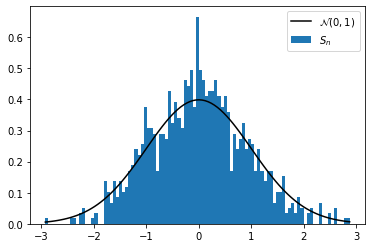

In [ ]:
n = 12
m = 1000
dados = clt(n, m)

it = np.linspace(min(dados), max(dados), 100)
plt.hist(dados, bins=it, density=True, label='$S_n$')
plt.plot(it, stats.norm.pdf(it, 0, 1), c="black", label="$\mathcal{N}(0,1)$")
plt.legend()

In [ ]:
pesos

array([0.0001, 0.0001, 0.0001, ..., 0.0001, 0.0001, 0.0001])

## Lei Fraca dos Grandes Números

In [ ]:
def lgn(e, n, plot=True):

  #e -> epsilon / o intervalo de confiança
  #n -> Tamanho da amostra Xn

  x = np.random.normal(10, 2, n)
  mu_real = 10.0
  mu_amostral = x.mean()
  if(plot):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])
    ax[0].plot(x, zorder=1)
    ax[0].hlines([mu_real],0,n-1, colors=['black'], zorder=2)
    ax[0].hlines([mu_real-e, mu_real+e],0,n-1, colors=['red'], zorder=2)
    ax[0].hlines([mu_amostral],0,n-1,colors=['purple'], zorder=2)
    ax[1].vlines([mu_real],0,n, colors=['black'], label="$S_n$")
    ax[1].vlines([mu_real-e, mu_real+e],0,n, colors=['red'], label="$\epsilon$")
    ax[1].vlines([mu_amostral],0,n,colors=['purple'], label="$X_n$")
    
    plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

  return np.abs(mu_real - mu_amostral)



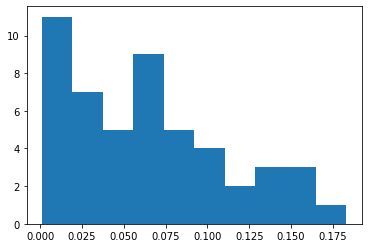

In [ ]:
diferencas = [ lgn(0.1, 500, False) for i in range(50)]

_ = plt.hist(diferencas)
  

## Desigualdade de Markov

$$ P(X \geq c) \leq \frac{\mathbb{E}[X]}{c}$$

In [ ]:
c = 3.6
mu = 1
sigma = 1
pxc = 1 - stats.norm.cdf(c, loc=mu, scale=sigma)
exc = mu/c
print("P(X >= c) = {}".format(pxc))
print("E[X] / c = {}".format(exc)) 

P(X >= c) = 0.004661188023718732
E[X] / c = 0.2777777777777778


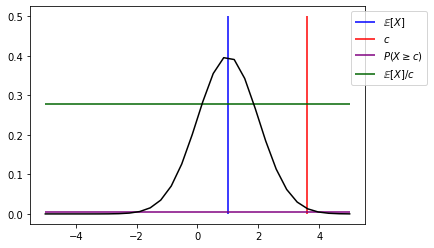

In [ ]:
it = np.linspace(-5, 5, 30)
plt.plot(it, stats.norm.pdf(it, mu, sigma), c="black")
plt.vlines([mu],0,.5, colors=['blue'], label="$\mathbb{E}[X]$")
plt.vlines([c],0,.5, colors=['red'], label="$c$")
plt.hlines([pxc],-5,5, colors=['purple'], label="$P(X \geq c)$")
plt.hlines([exc],-5,5, colors=['darkgreen'], label="$\mathbb{E}[X]/c$")
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

## Desigualdade de Chebyshev

$$P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}$$

In [ ]:
k = 2
mu = 1
sigma = 1
pxm = stats.norm.cdf(mu - k*sigma, loc=mu, scale=sigma) + \
    (1 - stats.norm.cdf(mu + k*sigma, loc=mu, scale=sigma))
k2 = 1/(k**2)
print("P(|X - mu| >= k*sigma) = {}".format(pxm))
print("1/k² = {}".format(k2)) 

P(|X - mu| >= k*sigma) = 0.0455002638963584
1/k² = 0.25


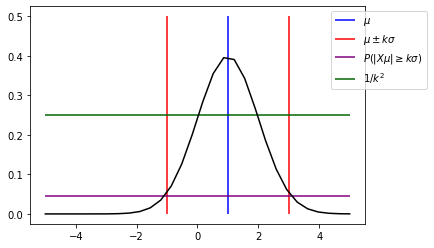

In [ ]:
it = np.linspace(-5, 5, 30)
plt.plot(it, stats.norm.pdf(it, mu, sigma), c="black")
plt.vlines([mu],0,.5, colors=['blue'], label="$\mu$")
plt.vlines([mu - k*sigma, mu + k*sigma],0,.5, colors=['red'], label="$\mu \pm k\sigma$")
plt.hlines([pxm],-5,5, colors=['purple'], label="$P(|X \mu| \geq k\sigma)$")
plt.hlines([k2],-5,5, colors=['darkgreen'], label="$1/k^2$")
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))